# business problem  


Facing challenges due to several factors such as stricter environmental regulations, higher flight taxes, increased interest rates, rising fuel prices and a tight labour market resulting in increased labour costs. As a result, the company's profitability is under pressure and they are seeking ways to address this issue. To tackle this challenge, they are looking to analyze their database to find ways to increase their occupancy rate. Which can help boost the average profit earned per seat.

Main Challenges:
Strict environmental regulations: demand on the airline industry to decrease its carbon footprint. Raising operational costs and restricting expansion potential 
Higher flight taxesraiseg the cost of flying anddecreaseg demand
Tight labour market increased labour costs: lack of trained professionals ithe n aviation sector has increased labour costs



In [67]:
# Importing Libraries 
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns



In [69]:
cursor.execute("""select name from sqlite_master where type ='table';""")
print('List of tables present in the database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [70]:
# Data Exploration 
# Load all tables
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
aircrafts_data.head()


,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [71]:
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [72]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [73]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [74]:
bookings = pd.read_sql_query("select * from bookings", connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [75]:
flights = pd.read_sql_query("select * from flights", connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [76]:
seats = pd.read_sql_query("select * from seats", connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [77]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [78]:
tickets = pd.read_sql_query("select * from tickets", connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [79]:
# Check the values of each column on all tables

for table in table_list:
    print('\ntable:', table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

In [80]:
# Check the missing value of all the tables 
for table in table_list:
    print('\ntable:', table)
    df_table = pd.read_sql_query(f"select * from {table}", connection)
    print(df_table.isnull().sum())


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic analysis by using the aircraft code we will look for the total number of seats in each airplane 

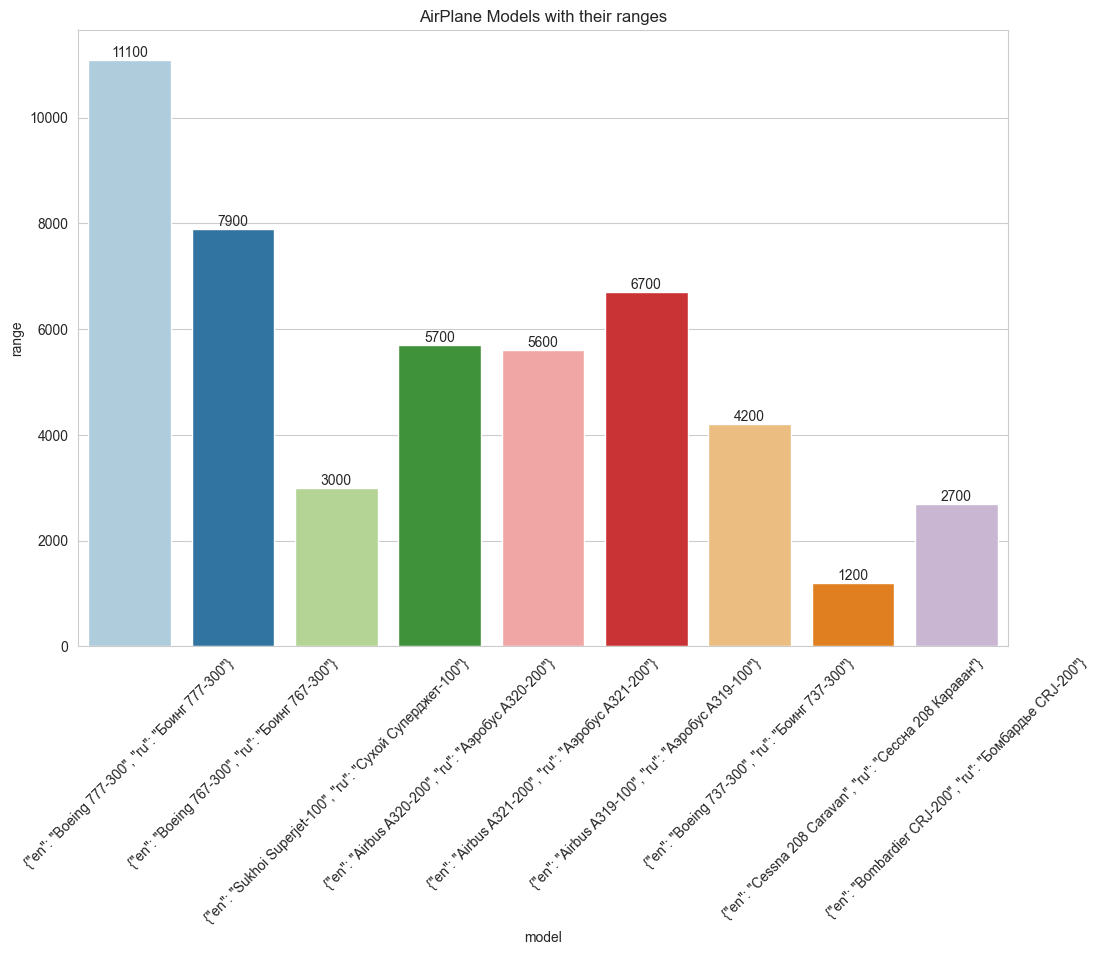

In [99]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='model',y='range', data=aircrafts_data, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirPlane Models with their ranges')
plt.xticks(rotation=45)
plt.show()

In [81]:

# Check how many planes have more then a hundred seats

pd.read_sql_query("""select aircraft_code, count(*) as numb_seats from seats
                        group by aircraft_code""", connection)

,aircraft_code,numb_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [82]:
# Check how many planes have more then a hundred seats
pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats
                        group by aircraft_code having num_seats >100""", connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


In [102]:
df = pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats
                        group by aircraft_code having num_seats >100""", connection)

df.to_csv('aircraft_seats.csv')

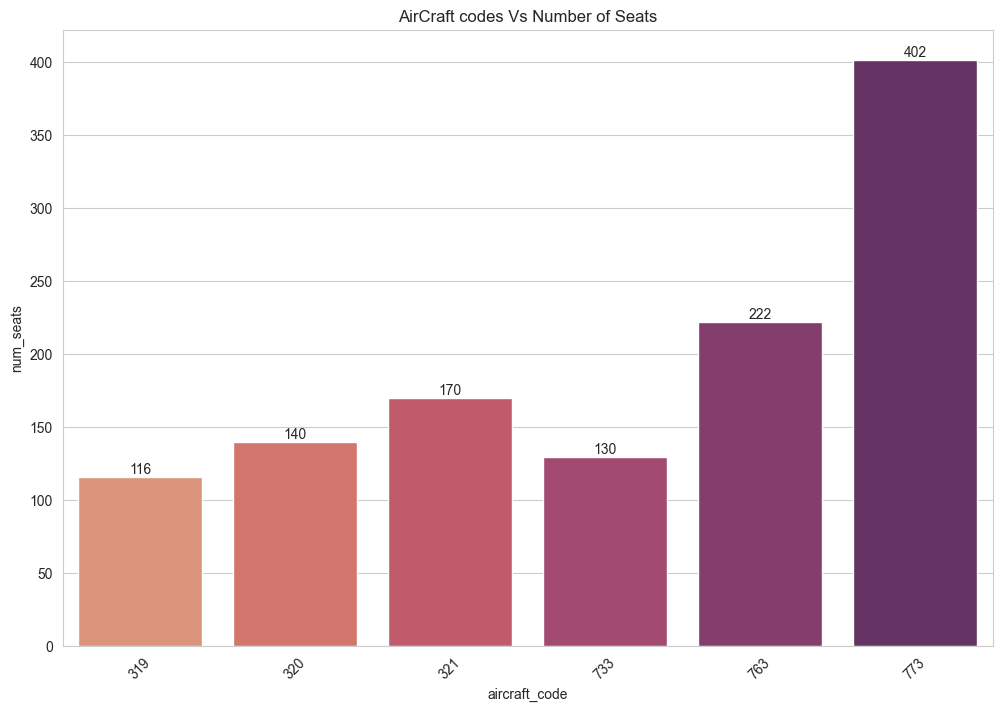

In [103]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='aircraft_code',y='num_seats', data=df, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirCraft codes Vs Number of Seats')
plt.xticks(rotation=45)
plt.show()

Shows aircrafts with more than 100 seats these findings will be useful in developing strategies that will help to increase occupancy rates and optimize pricing in each aircraft. Table 1 shows the count of how many seats there actually is

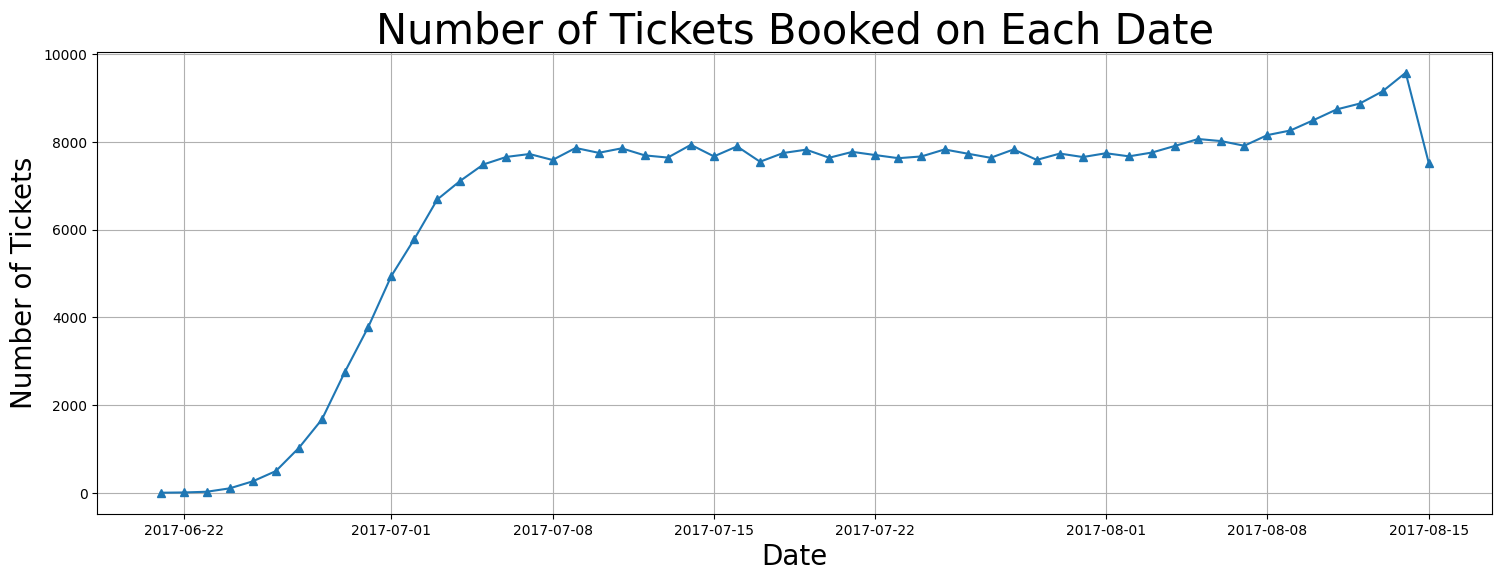

In [83]:
# How did the No. of tickets booked and the total amount earned changed with the time?

tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref""", connection)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
tickets_count = tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(tickets_count.index, tickets_count['date'], marker = '^')
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()

The line chart shows we observe that the number of tickets booked exhibits a gradual increase from June 22nd to July 7th which remained stagnant until August 8th when the number of tickets slightly increased, in august 15 we saw a sharp decline in tickets down to the same range as July 7th It is important to note that the revenue earned by the company from these bookings is closely tied to the number of tickets booked. These findings suggest that further exploration of the factors contributing to the peak in ticket bookings may be beneficial for increasing overall revenue and optimizing operational strategies.




In [84]:
# calculate the average charges for each aircraft with different fare conditions?

df = pd.read_sql_query("""select fare_conditions, aircraft_code,avg(amount)
                        from ticket_flights join flights
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""", connection)
df.to_csv('fare_avg_amount.csv')

<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

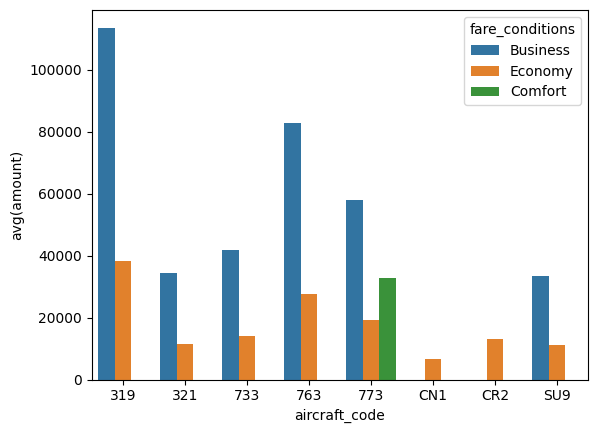

In [85]:
sns.barplot(data= df, x='aircraft_code', y='avg(amount)', hue='fare_conditions')

We are able to generate a bar graph to graphically compare the data after we completed the computations for the average costs associated with different fare conditions for each aircraft. The graph Figure 3 shows data for the three types of fare: business, economy, and confort. It is worth mentionning that the comfort class is available on only one craft, the 773. The CN1 and CR2 planes, on the other hand, only procide the economy class. When different pricing circumstances within each aircraft are compared, the charges for business class are consistently greater than those for economy class. This trend may be seen across all planes, regardless of fare conditions.

### Analyzing Occupancy Rate


Airlines must conduct comprehensive revenue analyses to optimize profitability effectively. Key metrics such as annual total revenue and average revenue per ticket per aircraft are pivotal in this assessment. By leveraging this data, airlines can discern which aircraft types and routes yield the highest returns, allowing for strategic operational adjustments. Moreover, this analysis aids in identifying areas for pricing optimization and resource allocation toward more lucrative routes.

Figure 4 illustrates total revenue, total tickets sold, and average revenue per ticket for each aircraft. Notably, the aircraft SU9 emerges with the highest total revenue, attributed to comparatively lower prices in both business and economy classes, likely attracting more passengers. Conversely, aircraft CN1 exhibits the lowest total revenue, possibly due to offering only economy class at minimal prices, potentially reflecting subpar conditions or limited amenities.

Average occupancy per aircraft stands as another critical metric. This figure enables airlines to gauge seat fill rates and identify opportunities to enhance occupancy, thereby boosting revenue and profitability while mitigating operational costs associated with empty seats. Factors influencing occupancy rates encompass pricing strategies, airline schedules, and customer satisfaction.

Figure 5 presents the average booked seats as a proportion of total seats for each aircraft, allowing calculation of the occupancy rate. A higher occupancy rate indicates more booked seats, with fewer remaining vacant.

Airlines can extrapolate potential improvements in annual turnover by hypothetically raising all aircraft's occupancy rates by 10%, further evaluating the viability of such a strategy. This analysis aids in understanding the financial implications of enhancing occupancy rates and guides decision-making toward achievable goals. By optimizing pricing strategies and operational parameters, airlines can elevate occupancy rates and revenue while delivering enhanced value and service to passengers. The accompanying figure depicts the incremental increase in total revenue resulting from a 10% rise in occupancy rates, indicating a gradual but promising growth trajectory, emphasizing the importance of refined pricing strategies in revenue optimization.es.



# For each aircraft, calculate the total revenue per year and the average revenue per ticket. 

In [98]:
pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count as avg_revenue_per_ticket from
                    (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code)""", connection)

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


# Calculate the average occupancy per aircraft

In [90]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code,avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate from
                (select aircraft_code,flights.flight_id,count(*) as seats_count from boarding_passes
                    inner join flights
                    on boarding_passes.flight_id = flights.flight_id
                    group by aircraft_code,flights.flight_id) as a
                    inner join 
                    (select aircraft_code,count(*) as num_seats from seats
                    group by aircraft_code) as b
                    on a.aircraft_code = b.aircraft_code group by a.aircraft_code""", connection
                  )
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143
1,321,88.80923076923077,170,0.5224072398190045
2,733,80.25546218487395,130,0.617349709114415
3,763,113.93729372937294,222,0.5132310528350132
4,773,264.9258064516129,402,0.659019419033863
5,CN1,6.004431314623338,12,0.5003692762186115
6,CR2,21.48284690220174,50,0.42965693804403476
7,SU9,56.81211267605634,97,0.5856918832583128


# Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.

In [92]:
occupancy_rate['inc occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [93]:
pd.set_option("display.float_format",str)

In [94]:
total_revenue = pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code""", connection)
total_revenue

occupancy_rate['inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc occupancy rate']
occupancy_rate


,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate,inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


# Conclusion


thorough analysis of revenue data, including yearly total revenue, average ticket revenue, and aircraft occupancy rates, is vital for airlines aiming to optimize profitability. By examining these metrics, airlines can identify areas for enhancement and adjust pricing and route strategies accordingly. A key aspect that can bolster profitability is achieving higher occupancy rates, as this enables airlines to maximize revenue while minimizing costs associated with empty seats. Adjusting aircraft pricing is essential, considering that excessively low or high prices can deter ticket purchases. It's imperative to set reasonable prices based on aircraft conditions and amenities, avoiding extremes.
Moreover, increasing occupancy rates should not compromise customer satisfaction or safety. Airlines must strike a balance between profitability and providing top-notch service while adhering to safety regulations. By embracing a data-driven approach to revenue analysis and optimization, airlines can position themselves for long-term success in a fiercely competitive industry.